In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('air_quality_data.csv')

In [19]:
df

,date,city,temperature,humidity,wind_speed,aqi
0,2023-04-13,Mumbai,38.1,40.6,14.6,192
1,2023-02-21,Chennai,35.5,42.8,9.7,215
2,2023-04-03,Hyderabad,25.3,30.8,13.9,192
3,2023-01-15,Mumbai,32.9,30.9,11.1,54
4,2023-04-17,Ahmedabad,31.9,79.8,4.3,270
...,...,...,...,...,...,...
1195,2023-03-09,Bangalore,39.1,46.8,4.3,52
1196,2023-01-10,Chennai,30.5,49.9,12.5,223
1197,2023-03-08,Lucknow,24.4,69.8,18.5,117
1198,2023-04-15,Hyderabad,29.2,82.2,20.0,74


In [23]:
print(df.head())

         date       city  temperature  humidity  wind_speed  aqi
0  2023-04-13     Mumbai         38.1      40.6        14.6  192
1  2023-02-21    Chennai         35.5      42.8         9.7  215
2  2023-04-03  Hyderabad         25.3      30.8        13.9  192
3  2023-01-15     Mumbai         32.9      30.9        11.1   54
4  2023-04-17  Ahmedabad         31.9      79.8         4.3  270


In [25]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1200 non-null   object 
 1   city         1200 non-null   object 
 2   temperature  1200 non-null   float64
 3   humidity     1200 non-null   float64
 4   wind_speed   1200 non-null   float64
 5   aqi          1200 non-null   int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 56.4+ KB
None


In [27]:
print(df.describe())

       temperature     humidity   wind_speed          aqi
count  1200.000000  1200.000000  1200.000000  1200.000000
mean     30.009083    60.295750     9.822417   174.218333
std       5.796113    17.156636     5.742742    72.061847
min      20.000000    30.000000     0.000000    50.000000
25%      24.800000    45.575000     4.900000   113.000000
50%      30.200000    60.800000     9.750000   174.000000
75%      35.000000    75.500000    14.800000   237.000000
max      40.000000    90.000000    20.000000   299.000000


In [29]:
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month
df['day_of_week'] = df['date'].dt.dayofweek

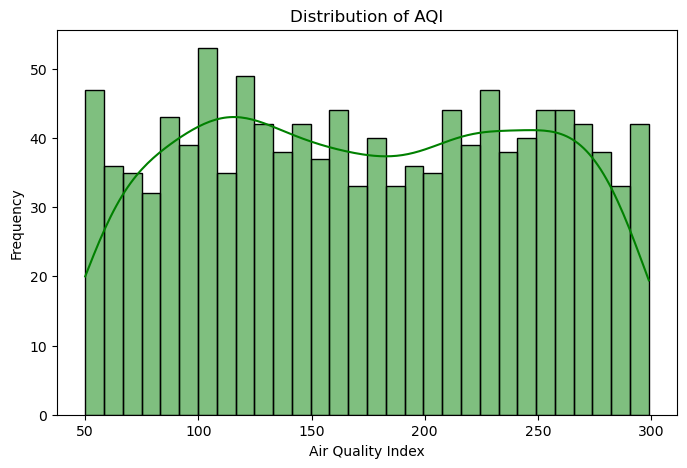

In [31]:
plt.figure(figsize=(8,5))
sns.histplot(df['aqi'], bins=30, kde=True, color='green')
plt.title('Distribution of AQI')
plt.xlabel('Air Quality Index')
plt.ylabel('Frequency')
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_5176\2185736009.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_aqi_city.index, y=avg_aqi_city.values, palette='viridis')


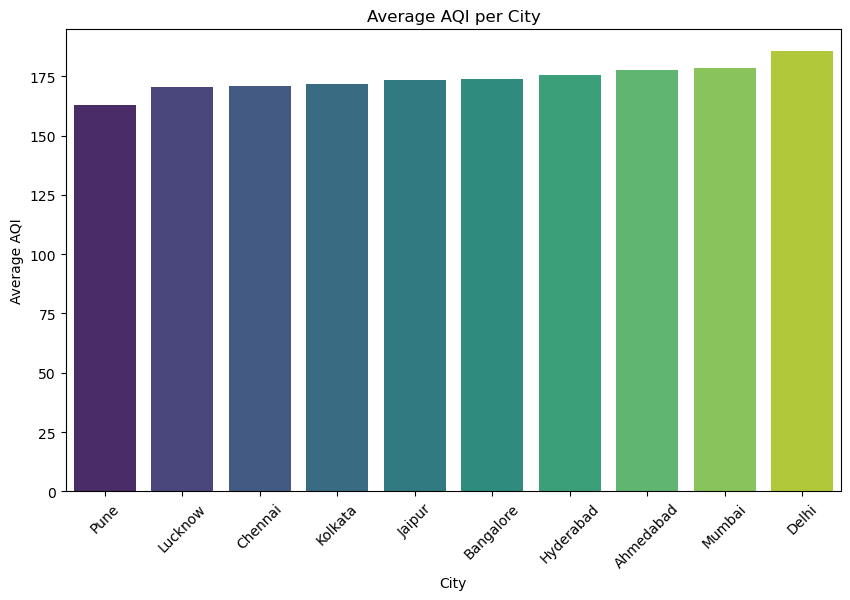

In [33]:
plt.figure(figsize=(10,6))
avg_aqi_city = df.groupby('city')['aqi'].mean().sort_values()
sns.barplot(x=avg_aqi_city.index, y=avg_aqi_city.values, palette='viridis')
plt.title('Average AQI per City')
plt.ylabel('Average AQI')
plt.xlabel('City')
plt.xticks(rotation=45)
plt.show()

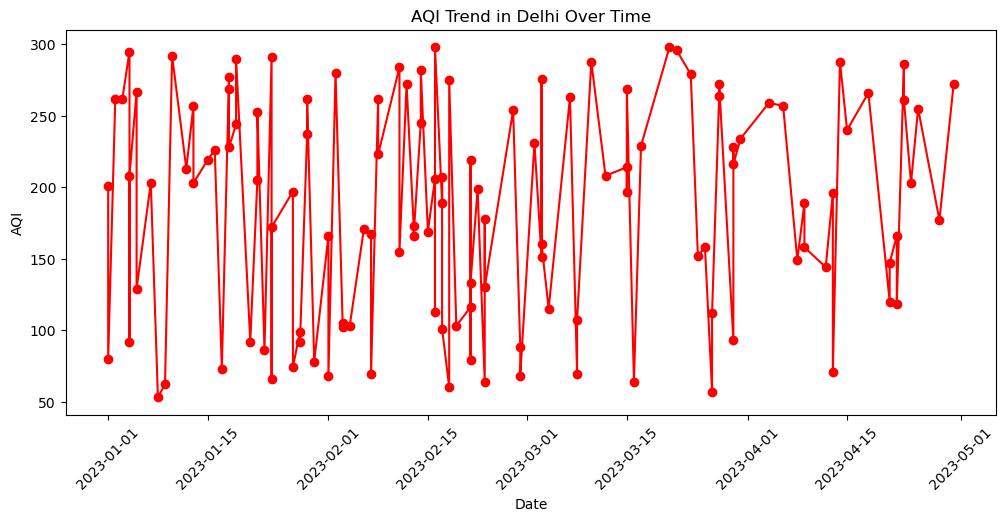

In [35]:
delhi_data = df[df['city']=='Delhi'].sort_values('date')
plt.figure(figsize=(12,5))
plt.plot(delhi_data['date'], delhi_data['aqi'], marker='o', color='red')
plt.title('AQI Trend in Delhi Over Time')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.xticks(rotation=45)
plt.show()

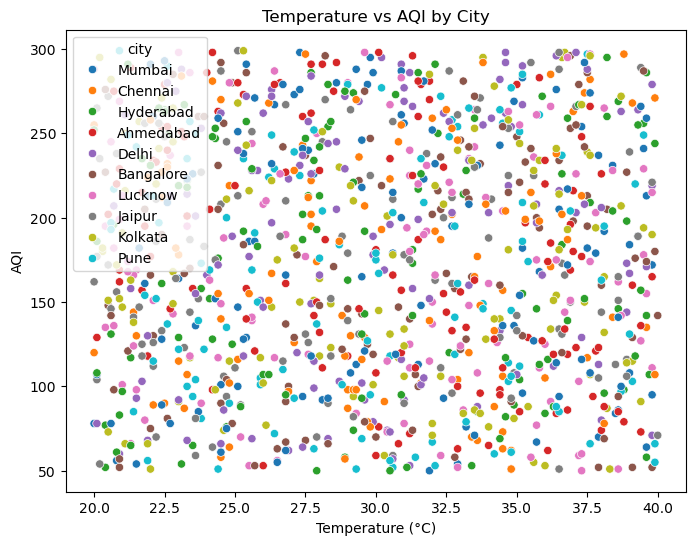

In [37]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='temperature', y='aqi', hue='city', data=df, palette='tab10')
plt.title('Temperature vs AQI by City')
plt.xlabel('Temperature (°C)')
plt.ylabel('AQI')
plt.show()

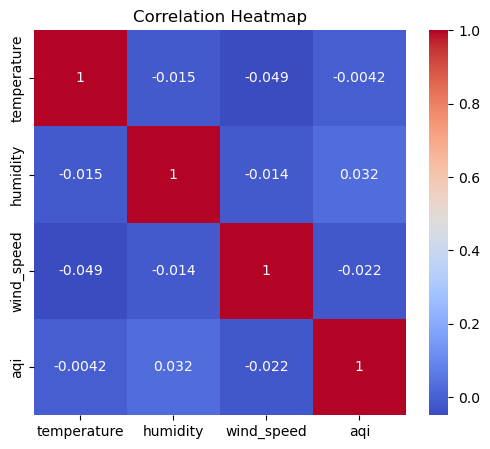

In [39]:
plt.figure(figsize=(6,5))
sns.heatmap(df[['temperature','humidity','wind_speed','aqi']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [41]:
df = df.dropna()
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month
df['day_of_week'] = df['date'].dt.dayofweek

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import joblib

In [45]:
X = df[['temperature','humidity','wind_speed','month','day_of_week']]
y = df['aqi']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [51]:
y_pred = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

Mean Squared Error: 5495.940360416666


In [55]:
joblib.dump(model, 'air_quality_model.pkl')
print("Model saved as 'air_quality_model.pkl'.")

Model saved as 'air_quality_model.pkl'.


In [59]:
model = joblib.load('air_quality_model.pkl')

In [93]:
X_test

,temperature,humidity,wind_speed,month,day_of_week
1178,30.9,64.0,0.2,3,3
865,34.7,76.4,13.9,2,0
101,30.1,32.7,12.5,4,2
439,39.3,46.1,8.7,4,6
58,27.6,88.5,2.0,3,1
...,...,...,...,...,...
382,24.5,73.2,3.9,4,3
867,26.5,67.6,16.4,2,2
542,39.5,66.3,16.6,1,6
1193,30.0,67.6,8.6,3,5
